# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

### Importando as Bibliotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando o banco de dados "previsao_de_renda.csv"

In [2]:
# importando e visualizando os dados do DataFrame
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [5]:
# Define a paleta de cores para as barras
palette = sns.color_palette("pastel")

<ipython-input-6-e46277e8f3e9>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='tempo_emprego', hue='posse_de_veiculo', palette=palette)


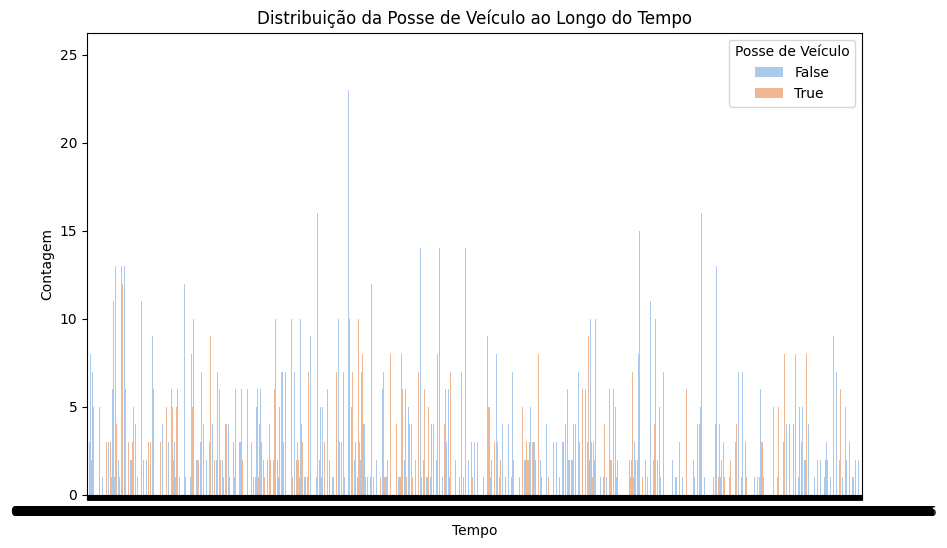

In [6]:
# Cria o gráfico de barras para a posse de veículo ao longo do tempo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tempo_emprego', hue='posse_de_veiculo', palette=palette)
plt.title('Distribuição da Posse de Veículo ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Contagem')
plt.legend(title='Posse de Veículo', loc='upper right')
plt.show()

<ipython-input-7-2b7b4e6335e5>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='tempo_emprego', hue='posse_de_imovel', palette=palette)


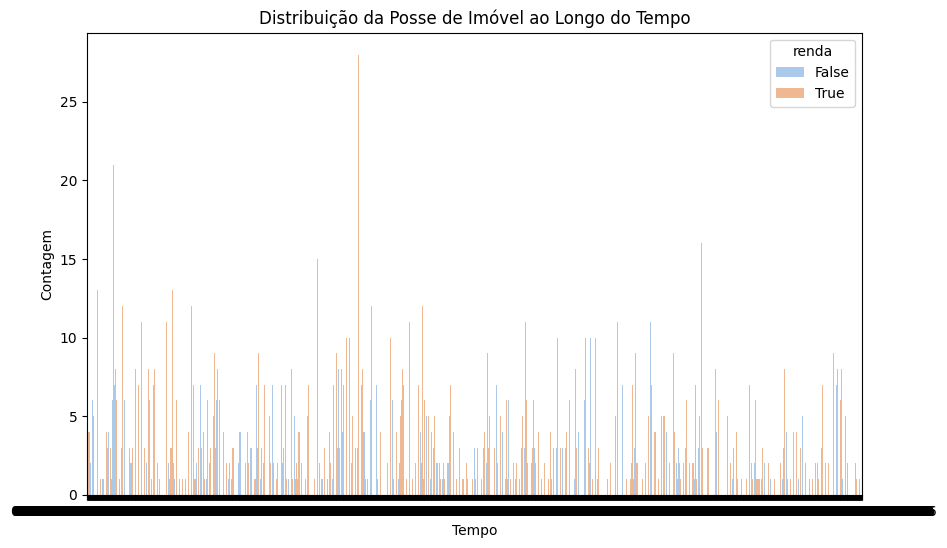

In [7]:
# Cria o gráfico de barras para a posse de imóvel ao longo do tempo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tempo_emprego', hue='posse_de_imovel', palette=palette)
plt.title('Distribuição da Posse de Imóvel ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Contagem')
plt.legend(title='renda', loc='upper right')
plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

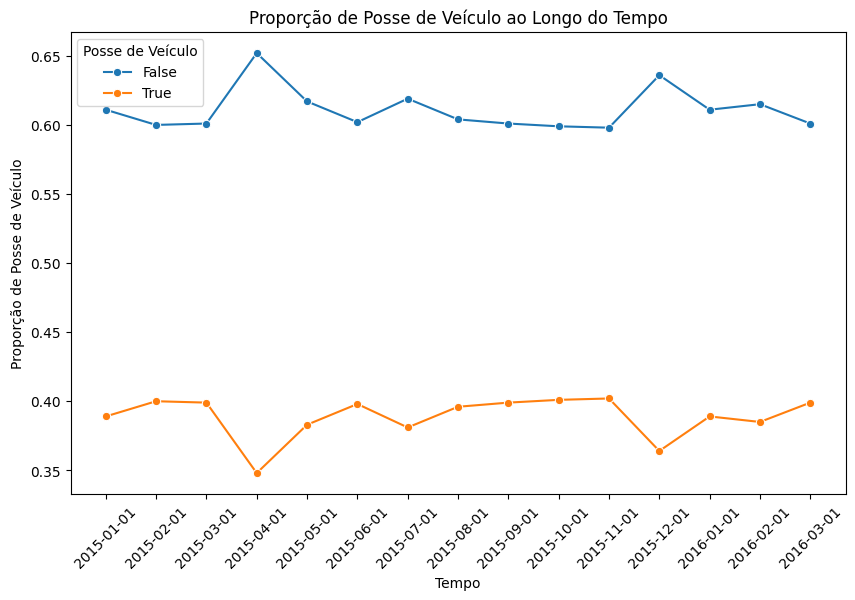

In [10]:
# Calcula a contagem de posse de veículo para cada tempo
count_posse_veiculo = df.groupby(['data_ref', 'posse_de_veiculo']).size().reset_index(name='count')

# Calcula a soma de posse de veículo para cada tempo
sum_posse_veiculo = df.groupby('data_ref').size().reset_index(name='sum')

# Junta os resultados para calcular as proporções de posse de veículo para cada tempo
means_posse_veiculo = pd.merge(count_posse_veiculo, sum_posse_veiculo, on='data_ref')

# Calcula a proporção de posse de veículo para cada tempo
means_posse_veiculo['proporcao'] = means_posse_veiculo['count'] / means_posse_veiculo['sum']

# Plota o gráfico de linha para posse de veículo no tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=means_posse_veiculo, x='data_ref', y='proporcao', hue='posse_de_veiculo', marker='o')
plt.title('Proporção de Posse de Veículo ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Proporção de Posse de Veículo')
plt.legend(title='Posse de Veículo')
plt.xticks(rotation=45)
plt.show()


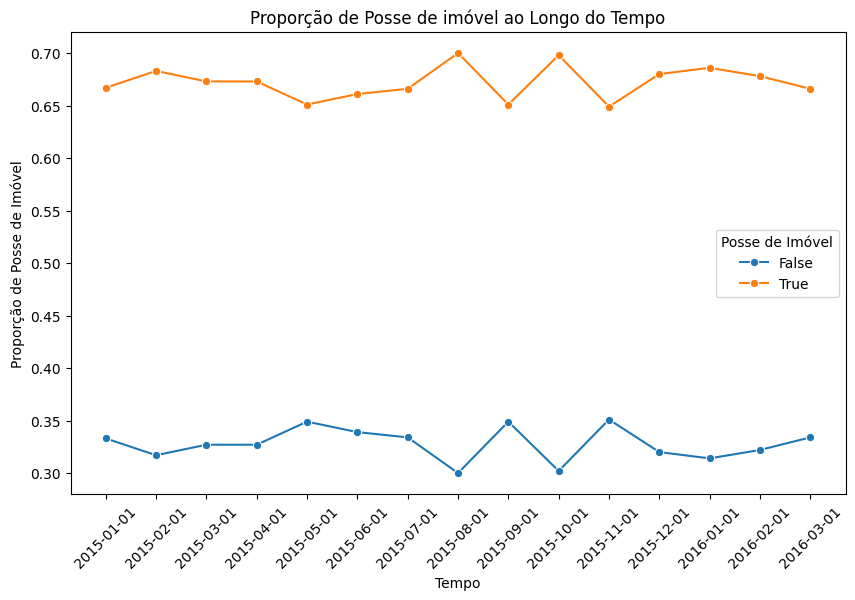

In [11]:
# Calcula a contagem de posse de imóvel para cada tempo
count_posse_imovel = df.groupby(['data_ref', 'posse_de_imovel']).size().reset_index(name='count')

# Calcula a soma de posse de imóvel para cada tempo
sum_posse_imovel = df.groupby('data_ref').size().reset_index(name='sum')

# Junta os resultados para calcular as proporções de posse de imóvel para cada tempo
means_posse_imovel = pd.merge(count_posse_imovel, sum_posse_imovel, on='data_ref')

# Calcula a proporção de posse de imóvel para cada tempo
means_posse_imovel['proporcao'] = means_posse_imovel['count'] / means_posse_imovel['sum']

# Plota o gráfico de linha para posse de imóvel no tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=means_posse_imovel, x='data_ref', y='proporcao', hue='posse_de_imovel', marker='o')
plt.title('Proporção de Posse de imóvel ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Proporção de Posse de Imóvel')
plt.legend(title='Posse de Imóvel')
plt.xticks(rotation=45)
plt.show()


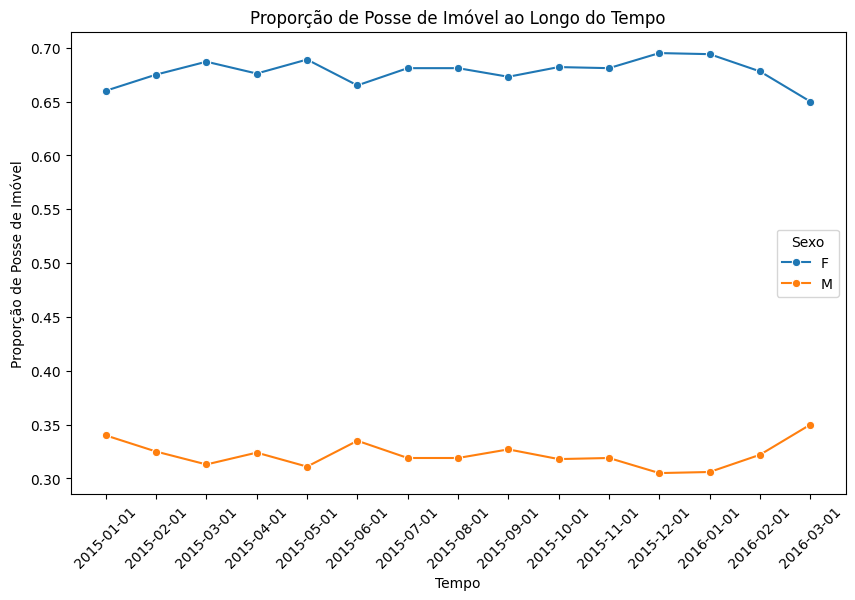

In [12]:
# Calcula a contagem de posse de imóvel para cada tempo e sexo
count_sexo = df.groupby(['data_ref', 'sexo']).size().reset_index(name='count')

# Calcula a soma de posse de imóvel para cada tempo
sum_sexo = df.groupby('data_ref').size().reset_index(name='sum')

# Junta os resultados para calcular as proporções de posse de imóvel para cada tempo
means_posse_imovel = pd.merge(count_sexo, sum_sexo, on='data_ref')

# Calcula a proporção de posse de imóvel para cada tempo
means_posse_imovel['proporcao'] = means_posse_imovel['count'] / means_posse_imovel['sum']

# Plota o gráfico de linha para posse de imóvel no tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=means_posse_imovel, x='data_ref', y='proporcao', hue='sexo', marker='o')
plt.title('Proporção de Posse de Imóvel ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Proporção de Posse de Imóvel')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()
